### Task 1 KNN classification for Iris dataset

In [185]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed = 2021

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


iris = load_iris()

print ('data contains:',iris.keys())

X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']

df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### Splitting for train and test 

*я взяв train_size - 60% і рандомно посортував датасет у випадку, якщо він був посортований*

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.6, shuffle=True, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
def normalize(X_train, X_test):
        scaler= MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)

print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


### Training KNN classifiers for different K

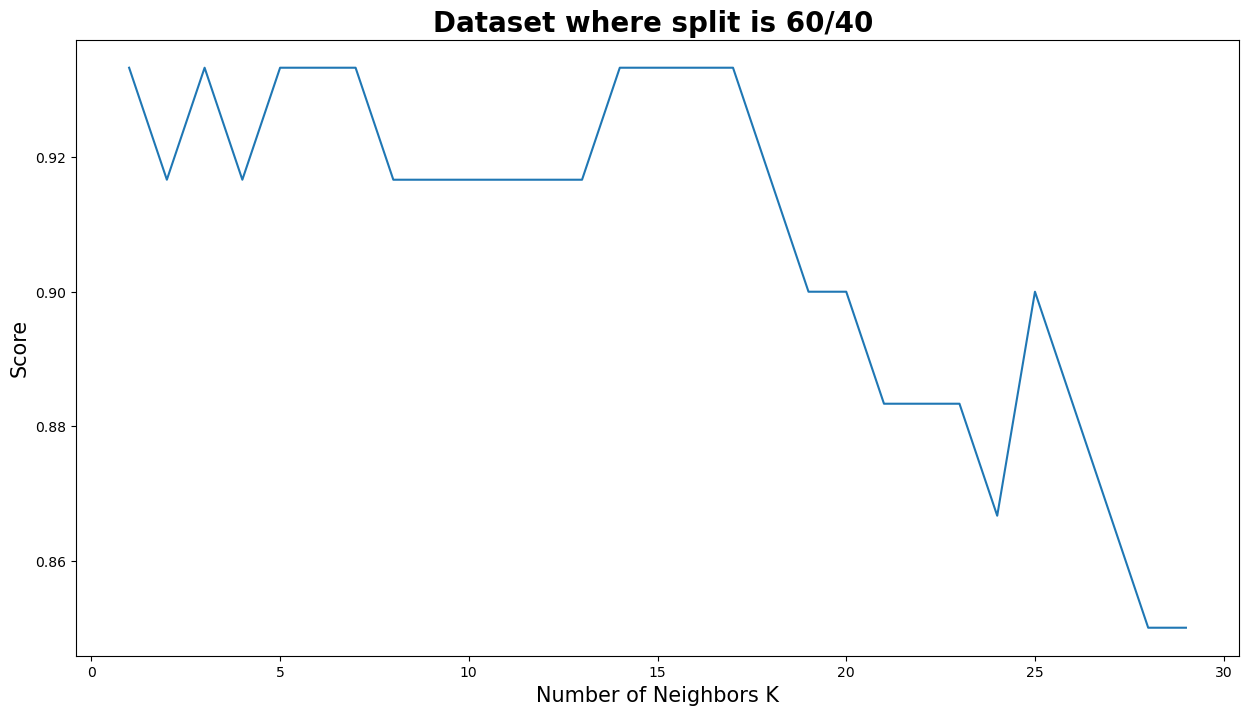

In [187]:
k_list = list(range(1,30,1))

scores = []

for k in k_list:    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    scores.append( knn.score(X_test_scaled , y_test) )
    
scores

plt.figure(figsize=(15,8))
plt.title('Dataset where split is 60/40 ', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.plot(k_list, scores)
plt.show()


In [188]:
k_best = k_list[np.argmax(scores)] # 'compute the best k'
score_best = np.max(scores) #'compute the best score'
print ('The best k = {} , score = {} *for dataset split 60/40'.format(k_best, score_best ))

The best k = 1 , score = 0.9333333333333333 *for dataset split 60/40


### Я також вирішив провірити датасети де розподіли були відповідно: 50/50, 70/30, 80/20

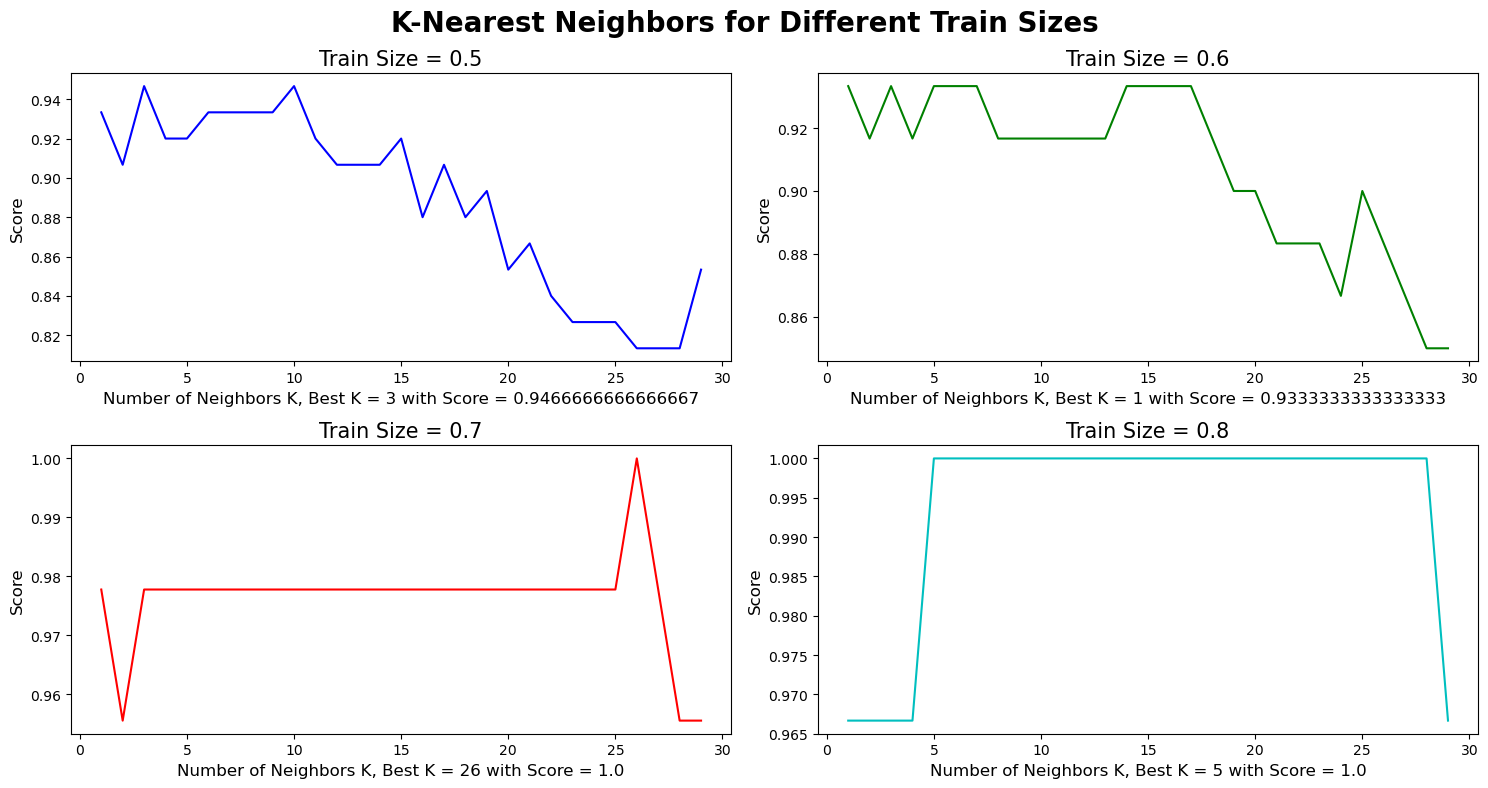

In [189]:
k_list = list(range(1, 30, 1))
train_sizes = [0.5, 0.6, 0.7, 0.8]
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
fig.suptitle('K-Nearest Neighbors for Different Train Sizes', fontsize=20, fontweight='bold')
colors = ['b', 'g', 'r', 'c']

for i, train_size in enumerate(train_sizes):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, shuffle=True, random_state=0)
    scores = []
    
    def normalize(X_train, X_test):
        scaler= MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

    X_train_scaled, X_test_scaled  = normalize(X_train, X_test)

    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        scores.append(knn.score(X_test_scaled , y_test))

    row, col = i // 2, i % 2
    ax = axes[row][col]
    ax.plot(k_list, scores, color=colors[i])
    ax.set_title(f'Train Size = {train_size}', fontsize=15)
    k_best = k_list[np.argmax(scores)]
    score_best = np.max(scores)
    ax.set_xlabel(f'Number of Neighbors K, Best K = {k_best} with Score = {score_best}', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()